# Evn

In [ ]:
import os
import random
import shutil
import json
import zipfile
import math
import copy
import collections
import re

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras.backend as K

from tqdm.notebook import tqdm

In [ ]:
# random seed initialize
random_seed = 1234
random.seed(random_seed)
np.random.seed(random_seed)
tf.random.set_seed(random_seed)

In [ ]:
!nvidia-smi

# 입력 및 Vocab

In [ ]:
# 입력 문장
sentences = [
    '나는 오늘 기분이 좋아 나는 오늘 우울해'
]

In [ ]:
# 각 문장을 띄어쓰기 단위로 분할
words = []
for sentence in sentences:
    words.extend(sentence.split())

# 중복 단어 제거
words = list(dict.fromkeys(words))

# 각 단어별 고유한 번호 부여
word_to_id = {'[PAD]': 0, '[UNK]': 1}
for word in words:
    word_to_id[word] = len(word_to_id)

# 각 숫자별 단어 부여
id_to_word = {_id:word for word, _id in word_to_id.items()}

word_to_id, id_to_word

In [ ]:
# 학습용 입력 데이터 생성
train_inputs = []
for sentence in sentences:
    train_inputs.append([word_to_id[word] for word in sentence.split()])

# train inputs을 numpy array로 변환
train_inputs = np.array(train_inputs)

train_inputs

In [ ]:
# embedding
embedding = tf.keras.layers.Embedding(len(word_to_id), 4)

In [ ]:
# 단어벡터
hidden = embedding(train_inputs)
hidden

# RNN

## return sequence=False, return_state=False

In [ ]:
# rnn
rnn_11 = tf.keras.layers.SimpleRNN(units=5)
output_11 = rnn_11(hidden)  # (bs, units)
print(output_11)

In [ ]:
# rnn weights
weights = rnn_11.get_weights()
Wx = weights[0]
Wh = weights[1]
b = weights[2]
print(Wx.shape)  # (d_model, unit)
print(Wh.shape)  # (unit, unit)
print(b.shape)  # (unit,)

## return sequence=True, return_state=False

In [ ]:
# (return_sequences=True)
rnn_12 = tf.keras.layers.SimpleRNN(units=5, return_sequences=True)
output_12 = rnn_12(hidden)  # (bs, seq, units)
print(output_12)

## return sequence=False, return_state=True

In [ ]:
# (return_state=True)
rnn_13 = tf.keras.layers.SimpleRNN(units=5, return_state=True)
output_13, fw_h_13 = rnn_13(hidden)  # (bs, units), (bs, units)
print(output_13)
print(fw_h_13)

## return sequence=True, return_state=True

In [ ]:
# (return_sequences=True, return_state=True)
rnn_14 = tf.keras.layers.SimpleRNN(units=5, return_sequences=True, return_state=True)
output_14, fw_h_14 = rnn_14(hidden)  # (bs, seq, units), (bs, units)
print(output_14)
print(fw_h_14)

## init hidden state

In [ ]:
rnn_11(hidden, initial_state=[fw_h_13])  # (bs, units)

In [ ]:
rnn_12(hidden, initial_state=[fw_h_14])  # (bs, n_seq, units)

In [ ]:
rnn_13(hidden, initial_state=[fw_h_13])  # (bs, units), (bs, units)

In [ ]:
rnn_14(hidden, initial_state=[fw_h_14])  # (bs, n_seq, units), (bs, units)

# LSTM

## return sequence=False, return_state=False

In [ ]:
# lstm
lstm_11 = tf.keras.layers.LSTM(units=5)
output_11 = lstm_11(hidden)  # (bs, units)
print(output_11)

In [ ]:
# lstm weights
weights = lstm_11.get_weights()
Wx = weights[0]
Wh = weights[1]
b = weights[2]
print(Wx.shape)  # (d_model, unit * 4) (Wxf, Wxi, Wxc, Wxo)
print(Wh.shape)  # (unit, unit * 4) (Whf, Whi, Whc, Who)
print(b.shape)  # (unit * 4) (bf, bi, bc, bo)

## return sequence=True, return_state=False

In [ ]:
# (return_sequences=True)
lstm_12 = tf.keras.layers.LSTM(units=5, return_sequences=True)
output_12 = lstm_12(hidden)  # (bs, seq, units)
print(output_12)

## return sequence=False, return_state=True

In [ ]:
# (return_state=True)
lstm_13 = tf.keras.layers.LSTM(units=5, return_state=True)
output_13, fw_h_13, fw_c_13 = lstm_13(hidden)  # (bs, units * 2), (bs, units), (bs, units)
print(output_13)
print(fw_h_13)
print(fw_c_13)

## return sequence=True, return_state=True

In [ ]:
# (return_sequences=True, return_state=True)
lstm_14 = tf.keras.layers.LSTM(units=5, return_sequences=True, return_state=True)
output_14, fw_h_14, fw_c_14 = lstm_14(hidden)  # (bs, seq, units), (bs, units), (bs, units)
print(output_14)
print(fw_h_14)
print(fw_c_14)

## init hidden state

In [ ]:
lstm_11(hidden, initial_state=[fw_h_13, fw_c_13])  # (bs, units)

In [ ]:
lstm_12(hidden, initial_state=[fw_h_14, fw_c_14])  # (bs, n_seq, units)

In [ ]:
lstm_13(hidden, initial_state=[fw_h_13, fw_c_13])  # (bs, units), (bs, units), (bs, units)

In [ ]:
lstm_14(hidden, initial_state=[fw_h_14, fw_c_14])  # (bs, n_seq, units), (bs, units), (bs, units)

# GRU

## return sequence=False, return_state=False

In [ ]:
# bi GRU
gru_11 = tf.keras.layers.GRU(units=5)
output_11 = gru_11(hidden)  # (bs, units)
print(output_11)

In [ ]:
# bi GRU weights
weights = gru_11.get_weights()
Wx = weights[0]
Wh = weights[1]
b = weights[2]
print(Wx.shape)  # (d_model, unit * 3) (Wxr, Wxz, Wxg)
print(Wh.shape)  # (unit, unit * 3) (Whr, Whz, Whg)
print(b.shape)  # (2, unit * 3) (bxr, bxz, bxg),(bhr, bhz, bhg)

## return sequence=True, return_state=False

In [ ]:
# (return_sequences=True)
gru_12 = tf.keras.layers.GRU(units=5, return_sequences=True)
output_12 = gru_12(hidden)  # (bs, seq, units)
print(output_12)

## return sequence=False, return_state=True

In [ ]:
# (return_state=True)
gru_13 = tf.keras.layers.GRU(units=5, return_state=True)
output_13, fw_h_13 = gru_13(hidden)  # (bs, units), (bs, units)
print(output_13)
print(fw_h_13)

## return sequence=True, return_state=True

In [ ]:
# (return_sequences=True, return_state=True)
gru_14 = tf.keras.layers.GRU(units=5, return_sequences=True, return_state=True)
output_14, fw_h_14 = gru_14(hidden)  # (bs, seq, units * 2), (bs, units)
print(output_14)
print(fw_h_14)

## init hidden state

In [ ]:
gru_11(hidden, initial_state=[fw_h_13])  # (bs, units)

In [ ]:
gru_12(hidden, initial_state=[fw_h_14])  # (bs, n_seq, units)

In [ ]:
gru_13(hidden, initial_state=[fw_h_13])  # (bs, units), (bs, units)

In [ ]:
gru_14(hidden, initial_state=[fw_h_14])  # (bs, n_seq, units), (bs, units)

# Bidirectional RNN

## return sequence=False, return_state=False

In [ ]:
# bi rnn
bi_rnn_11 = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(units=5))
output_11 = bi_rnn_11(hidden)  # (bs, units * 2)
print(output_11)

In [ ]:
# bi rnn weights
weights = bi_rnn_11.get_weights()
Wx = weights[0]
Wh = weights[1]
b = weights[2]
print(Wx.shape)  # (d_model, unit)
print(Wh.shape)  # (unit, unit)
print(b.shape)  # (unit,)

## return sequence=True, return_state=False

In [ ]:
# (return_sequences=True)
bi_rnn_12 = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(units=5, return_sequences=True))
output_12 = bi_rnn_12(hidden)  # (bs, seq, units* 2)
print(output_12)

## return sequence=False, return_state=True

In [ ]:
# (return_state=True)
bi_rnn_13 = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(units=5, return_state=True))
output_13, fw_h_13, bw_h_13 = bi_rnn_13(hidden)  # (bs, units * 2), (bs, units), (bs, units)
print(output_13)
print(fw_h_13)
print(bw_h_13)

## return sequence=True, return_state=True

In [ ]:
# (return_sequences=True, return_state=True)
bi_rnn_14 = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(units=5, return_sequences=True, return_state=True))
output_14, fw_h_14, bw_h_14 = bi_rnn_14(hidden)  # (bs, seq, units * 2), (bs, units), (bs, units)
print(output_14)
print(fw_h_14)
print(bw_h_14)

## return sequence=True, return_state=True, dual cell

In [ ]:
fw_cell = tf.keras.layers.SimpleRNN(units=5, return_sequences=True, return_state=True)
bw_cell = tf.keras.layers.SimpleRNN(units=5, go_backwards=True, return_sequences=True, return_state=True)
bi_rnn_15 = tf.keras.layers.Bidirectional(fw_cell, backward_layer=bw_cell)
output_15, fw_h_15, bw_h_15 = bi_rnn_15(hidden)  # (bs, seq, units * 2), (bs, units), (bs, units)
print(output_15)
print(fw_h_15)
print(bw_h_15)

## init hidden state

In [ ]:
bi_rnn_11(hidden, initial_state=[fw_h_13, bw_h_13])  # (bs, units * 2)

In [ ]:
bi_rnn_12(hidden, initial_state=[fw_h_14, bw_h_13])  # (bs, n_seq, units * 2)

In [ ]:
bi_rnn_13(hidden, initial_state=[fw_h_13, bw_h_13])  # (bs, units * 2), (bs, units), (bs, units)

In [ ]:
bi_rnn_14(hidden, initial_state=[fw_h_14, bw_h_14])  # (bs, n_seq, units * 2), (bs, units), (bs, units)

In [ ]:
bi_rnn_15(hidden, initial_state=[fw_h_15, bw_h_15])  # (bs, n_seq, units * 2), (bs, units), (bs, units)

# Bidirectional LSTM

## return sequence=False, return_state=False

In [ ]:
# lstm
bi_lstm_11 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=5))
output_11 = bi_lstm_11(hidden)  # (bs, units * 2)
print(output_11)

In [ ]:
# lstm weights
weights = bi_lstm_11.get_weights()
Wx = weights[0]
Wh = weights[1]
b = weights[2]
print(Wx.shape)  # (d_model, unit * 4) (Wxf, Wxi, Wxc, Wxo)
print(Wh.shape)  # (unit, unit * 4) (Whf, Whi, Whc, Who)
print(b.shape)  # (unit * 4) (bf, bi, bc, bo)

## return sequence=True, return_state=False

In [ ]:
# (return_sequences=True)
bi_lstm_12 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=5, return_sequences=True))
output_12 = bi_lstm_12(hidden)  # (bs, seq, units * 2)
print(output_12)

## return sequence=False, return_state=True

In [ ]:
# (return_state=True)
bi_lstm_13 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=5, return_state=True))
output_13, fw_h_13, fw_c_13, bw_h_13, bw_c_13 = bi_lstm_13(hidden)  # (bs, units * 2), (bs, units), (bs, units), (bs, units), (bs, units)
print(output_13)
print(fw_h_13)
print(fw_c_13)
print(bw_h_13)
print(bw_c_13)

## return sequence=True, return_state=True

In [ ]:
# (return_sequences=True, return_state=True)
bi_lstm_14 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=5, return_sequences=True, return_state=True))
output_14, fw_h_14, fw_c_14, bw_h_14, bw_c_14 = bi_lstm_14(hidden)  # (bs, seq, units), (bs, units), (bs, units), (bs, units), (bs, units)
print(output_14)
print(fw_h_14)
print(fw_c_14)
print(bw_h_14)
print(bw_c_14)

## return sequence=True, return_state=True, dual cell

In [ ]:
fw_cell = tf.keras.layers.LSTM(units=5, return_sequences=True, return_state=True)
bw_cell = tf.keras.layers.LSTM(units=5, go_backwards=True, return_sequences=True, return_state=True)
bi_lstm_15 = tf.keras.layers.Bidirectional(fw_cell, backward_layer=bw_cell)
output_15, fw_h_15, fw_c_15, bw_h_15, bw_c_15 = bi_lstm_15(hidden)  # (bs, seq, units), (bs, units), (bs, units), (bs, units), (bs, units)
print(output_15)
print(fw_h_15)
print(fw_c_15)
print(bw_h_15)
print(bw_c_15)

## init hidden state

In [ ]:
bi_lstm_11(hidden, initial_state=[fw_h_13, fw_c_13, bw_h_13, bw_c_13])  # (bs, units * 2)

In [ ]:
bi_lstm_12(hidden, initial_state=[fw_h_14, fw_c_14, bw_h_14, bw_c_14])  # (bs, n_seq, units * 2)

In [ ]:
bi_lstm_13(hidden, initial_state=[fw_h_13, fw_c_13, bw_h_13, bw_c_13])  # (bs, units * 2), (bs, units), (bs, units), (bs, units), (bs, units)

In [ ]:
bi_lstm_14(hidden, initial_state=[fw_h_14, fw_c_14, bw_h_14, bw_c_14])  # (bs, n_seq, units * 2), (bs, units), (bs, units), (bs, units), (bs, units)

In [ ]:
bi_lstm_15(hidden, initial_state=[fw_h_15, fw_c_15, bw_h_15, bw_c_15])  # (bs, n_seq, units * 2), (bs, units), (bs, units), (bs, units), (bs, units)

# Bidirectional GRU

## return sequence=False, return_state=False

In [ ]:
# bi GRU
bi_gru_11 = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=5))
output_11 = bi_gru_11(hidden)  # (bs, units * 2)
print(output_11)

In [ ]:
# bi GRU weights
weights = bi_gru_11.get_weights()
Wx = weights[0]
Wh = weights[1]
b = weights[2]
print(Wx.shape)  # (d_model, unit * 3) (Wxr, Wxz, Wxg)
print(Wh.shape)  # (unit, unit * 3) (Whr, Whz, Whg)
print(b.shape)  # (2, unit * 3) (bxr, bxz, bxg),(bhr, bhz, bhg)

## return sequence=True, return_state=False

In [ ]:
# (return_sequences=True)
bi_gru_12 = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=5, return_sequences=True))
output_12 = bi_gru_12(hidden)  # (bs, seq, units* 2)
print(output_12)

## return sequence=False, return_state=True

In [ ]:
# (return_state=True)
bi_gru_13 = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=5, return_state=True))
output_13, fw_h_13, bw_h_13 = bi_gru_13(hidden)  # (bs, units * 2), (bs, units), (bs, units)
print(output_13)
print(fw_h_13)
print(bw_h_13)

## return sequence=True, return_state=True

In [ ]:
# (return_sequences=True, return_state=True)
bi_gru_14 = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=5, return_sequences=True, return_state=True))
output_14, fw_h_14, bw_h_14 = bi_gru_14(hidden)  # (bs, seq, units * 2), (bs, units), (bs, units)
print(output_14)
print(fw_h_14)
print(bw_h_14)

## return sequence=True, return_state=True, dual cell

In [ ]:
fw_cell = tf.keras.layers.GRU(units=5, return_sequences=True, return_state=True)
bw_cell = tf.keras.layers.GRU(units=5, go_backwards=True, return_sequences=True, return_state=True)
bi_gru_15 = tf.keras.layers.Bidirectional(fw_cell, backward_layer=bw_cell)
output_15, fw_h_15, bw_h_15 = bi_gru_15(hidden)  # (bs, seq, units), (bs, units), (bs, units)
print(output_15)
print(fw_h_15)
print(bw_h_15)

## init hidden state

In [ ]:
bi_gru_11(hidden, initial_state=[fw_h_13, bw_h_13])  # (bs, units * 2)

In [ ]:
bi_gru_12(hidden, initial_state=[fw_h_14, bw_h_13])  # (bs, n_seq, units * 2)

In [ ]:
bi_gru_13(hidden, initial_state=[fw_h_13, bw_h_13])  # (bs, units * 2), (bs, units), (bs, units)

In [ ]:
bi_gru_14(hidden, initial_state=[fw_h_14, bw_h_14])  # (bs, n_seq, units * 2), (bs, units), (bs, units)

In [ ]:
bi_gru_15(hidden, initial_state=[fw_h_15, bw_h_15])  # (bs, n_seq, units * 2), (bs, units), (bs, units)

# RNN 모델

In [ ]:
def build_model(n_vocab, d_model, n_seq, n_out):
    """
    RNN 모델
    :param n_vocab: vocabulary 단어 수
    :param d_model: 단어를 의미하는 벡터의 차원 수
    :param n_seq: 문장길이 (단어 수)
    :param n_out: 예측할 class 개수
    """
    input = tf.keras.layers.Input(shape=(n_seq,))

    embedding = tf.keras.layers.Embedding(n_vocab, d_model)  # (n_vocab x d_model)
    hidden = embedding(input)  # (bs, 1, d_model)

    hidden = tf.keras.layers.SimpleRNN(units=d_model, return_sequences=True)(hidden)
    hidden = tf.keras.layers.LSTM(units=d_model, return_sequences=True)(hidden)
    hidden = tf.keras.layers.GRU(units=d_model, return_sequences=True)(hidden)
    hidden = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(units=d_model, return_sequences=True))(hidden)
    hidden = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=d_model, return_sequences=True))(hidden)
    hidden = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=d_model, return_sequences=True))(hidden)
    output = tf.keras.layers.Dense(n_out, activation=tf.nn.softmax)(hidden)  # (bs, 1, n_vocab)

    model = tf.keras.Model(inputs=input, outputs=output)
    return model

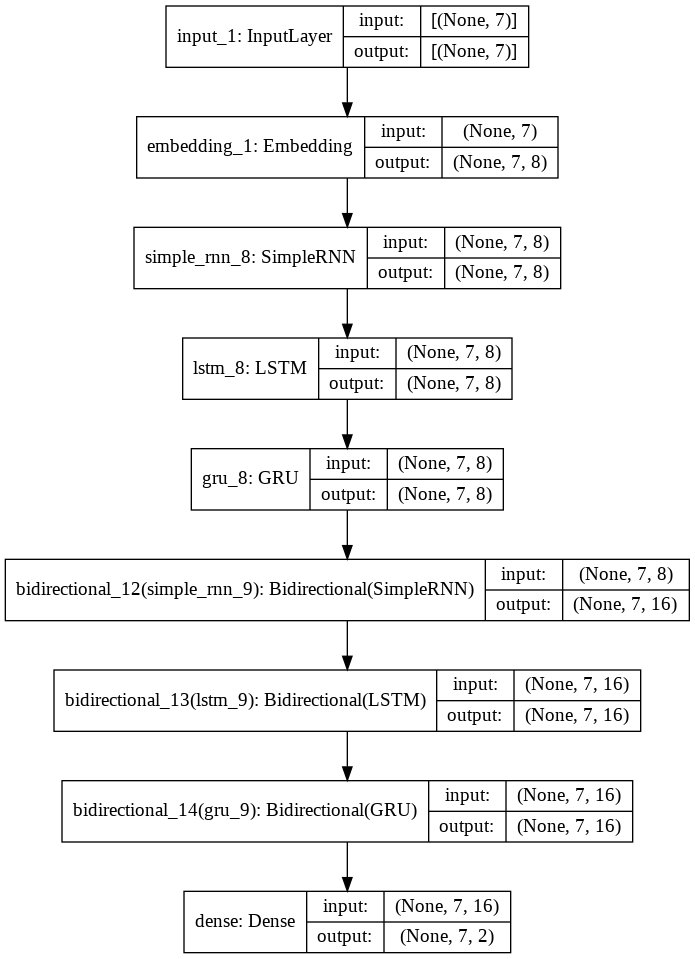

In [ ]:
# 모델 생성
model = build_model(len(word_to_id), 8, 7, 2)
# 모델 내용 그래프 출력
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [ ]:
model.predict(train_inputs)